# Exercise

# #1

/Users/chaklam/DSAI/Environments/teaching_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


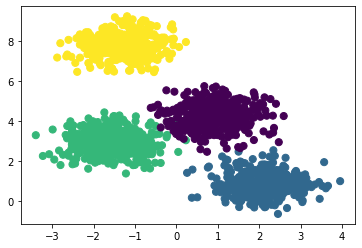

In [1]:
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from time import time

X, y_true = make_blobs(n_samples=1500, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=50);

In [2]:
#Implement K-means from scratch
#should be pretty simple

#1. Randomly choose n clusters from X
#2. Assign lables based on closest center
#3. find new centers using the mean of each class samples
#4. Repeat until centers do not change anymore
#5. To predict, simply use the function you have defined
#.  in #2

#For every iteration, plot the centers and the colors of each sample

# #2

In [3]:
#Implmenet Mini-Batch K-means
#this should be simple once you finish #1
#Mini-batch is simply using X[i:i+batch_size] for updating the centers
#One more consideration is that Mini-Batch will rarely converge
#thus it is important to add a max_iteration or some tolerance
#Last, theoretically speaking, Mini-Batch will never perform better
#in terms of accuracy when compare to K-means, but it is very close
#to optimal but will almost always beat K-means in terms of time
#given large dataset and a modest tolerance parameter

# #3

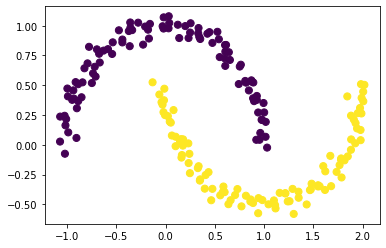

In [4]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y,
            s=50, cmap='viridis');

Implement spectral clustering with nearest neighbors kernel
Source: https://arxiv.org/pdf/0711.0189.pdf

Spectral clustering is a linear-algebra way of framing the clustering problems.  By making it a graph problem, we can define the best partition between subset of graphs based on minimizing graph cut.  Again, for those who would like to understand spectral embedding, recommend to read this paper: https://arxiv.org/pdf/0711.0189.pdf

The steps are simple (after all difficult derivation):

1. Create a **adjacency matrix (A)** graph.  You can use sklearn.neighbors.kneighbors_graph to create an adjacency matrix

For those who are unfamiliar with adjacency matrix, consider this matrix.  In reality, A, B, C, D do not exist, I just wrote for explaination purpose.

<code>  
     A B C D
A  [[0 1 1 0
B    1 0 1 0
C    1 1 0 0
D    0 0 0 0]]
</code>

Adjacency matrix is basically telling who are connected to who.  Here A is connected to B and C.  Since this is an undirected graph, thus B and C are also connected to A as depicted in their intersections.
    
2. Computer the **degree matrix(D)**

Degree matrix is simply the sum of all rows.  With the above example, it will be [2, 2, 2, 0]. Given it's a matrix, we will be putting these values in a diagonals like this:

<code>
[[2 0 0 0
  0 2 0 0
  0 0 2 0
  0 0 0 0]]
</code>
  
3. Compute the **Laplacian graph**

Laplacian is simply D - A which becomes

<code>
[[2 -1 -1 0
  -1 2 -1 0
  -1 -1 2 0
   0 0  0 0]]
</code>

4. This Laplacian graph has a nice (powerful) property, that is, its eigenvalues actually inform us the connection between nodes.  Bigger eigenvalues represent bigger connections.  Specifically, the first eigenvalues of L will be merely the connection of the whole graph which will always be 0 (because it's one connected component thus there are no connection), but then the second smallest eigenvalues (also known as Fielder value) will give you the optimal partition between two graphs.  It approximates the minimium graph cut needed to separate into two connected components.  It works because remember that eigenvalues = connectivity.  Thus the second smallest eigenvalue will tell us the minimum separation of two components, which is the best point to cut between two clusters!

5.  Last, we simply use the sign of the eigenvector to partition into either clusters.


# #4

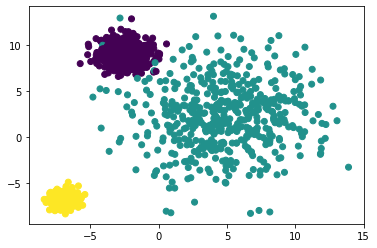

In [5]:
from sklearn import datasets
X, y = datasets.make_blobs(n_samples=1500,
                             cluster_std=[1.0, 3.5, 0.5],
                            random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y)

Use the above data, fit Gaussian mixture model from scratch

The concept is fairly simple.  Indeed, it is very similar to K-Means, i.e., instead of using the mean to determine which point belongs to which cluster, it uses the probability of a gaussian distribution to determine whether each sample $x_i$ should belong to which clusters.  For example, sample $x_i$ probabilty with first cluster is 0.1 and second cluster is 0.5, then we will assign $x_i$ to second cluster.  

Of course, similar to K-means, we also have to update the cluster gaussian distribution.  The formula will be given below.

That's it!

Detailed steps are as follows:

**Initialization:**
1. Define k number of clusters (c)
2. For each cluster, randomly initialize parameters mean $\mu_c$, covariance $\Sigma_c$, and fraction per class $\pi_c$ 

**E-step:** 
1. For each $x_i$, calculate the probability $r_{ic}$ (shape: $n * k$) that $x_i$ belongs to cluster c using this equation:

$$ r_{ic} = \frac{\pi_cN(x_i \mid \mu_c, \Sigma_{c})}{\Sigma_{k=1}^{K} \pi_kN(x_i \mid \mu_k, \Sigma_k)}$$

where $N(x_i \mid \mu_c, \Sigma_c)$ is the multivariate Gaussian distribution, computed using:

$$N(x_i \mid \mu_c, \Sigma_c)= \frac{1}{(2\pi)^\frac{n}{2}\lvert{\Sigma_c}\rvert^\frac{1}{2}}\exp(-\frac{1}{2}(x_i-\mu_c)^T\Sigma_{c}^{-1}(x_i - \mu_c))$$

$r_ic$ basically gives us $$ \frac{\text{Probability of x_i belonging to class c}}{\text{Probability of x_i over all classes}} $$

**M-step:**
1. For each cluster c, recompute the gaussian distribution - namely update the $\mu_c$, covariance $\Sigma_c$, and fraction per class $\pi_c$.

Fraction of points belongs to cluster c:

$$ m_c = \Sigma{_i}r_{ic} $$

Fraction per class:

$$ \pi_c = \frac{m_c}{m}$$

Mean of each cluster c:

$$ \mu_c = \frac{1}{m_c}\Sigma{_i}r_{ic}x_i$$

Covariance of each cluster:

$$ \Sigma{_c} = \frac{1}{m_c}\Sigma{_i}r_{ic}(x_i - \mu_c)(x_i - \mu_c)^T $$

Iteratively repeat the E and M step until the log likelihood function converges.  Can be computed as follows:

$$ ln p(X \mid \pi, \mu, \Sigma) = \Sigma_{i=1}^{N} ln(\Sigma_{k=1}^{K}\pi_kN(x_i\mid\mu_k,\Sigma_k)) $$

**Coding considerations**

1.  To ease our programming efforts, we can use <code>scipy.stats.multivariate_normal</code> for generating gaussian distribution, and using its <code>.pdf()</code> function to compute the values we want of $N(x_i \mid \mu_c, \Sigma_c)$ and use <code>logpdf()</code> to define stopping criteria

2. Shape of $R$ which keeps probability of $x_i$ belonging to kth cluster is $(n * k)$, where n is <code>X.shape[0]</code> and k is <code>n_clusters</code> we want.  This fact will be helpful when initializing

3. Shape of $\Sigma$ or covariance of each cluster is simply $(m * m)$ where m is n_features or X.shape[1]. If we define 3 clusters, then we will have [$\Sigma_1$, $\Sigma_2$, $\Sigma_3$], each with shape $(m * m)$, thus whole thing is shape $ (k * m * m) $

4. Shape of $\pi$ is simply $(k, )$
    
5. Shape of $\mu$ is similarly $(m, k)$, defining mean for each feature for kth cluster

6. What to initialize can be tricky.  For R and $\pi$, you can fill with 1/k.  As for $\mu$, it is easiest to simply pick random points from the samples as initial means.  Last, for covariance ($\Sigma$), we can simply use the covariance of the X as initialization (i.e., <code>np.cov(X.T)</code>)

# Solution

# #1

Done in 14 iterations
Fit and predict time: 0.05296683311462402


Text(0.5, 1.0, 'Final result')

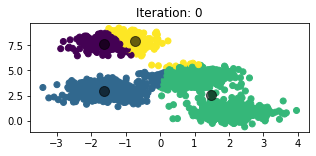

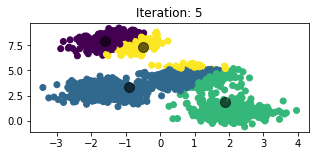

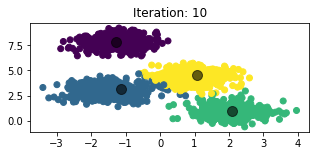

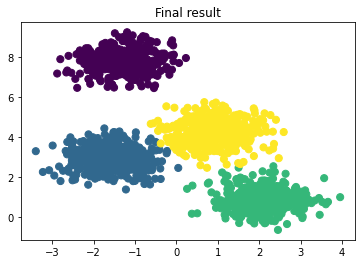

In [6]:
#Implement K-means from scratch
from sklearn.metrics import pairwise_distances_argmin

X, y_true = make_blobs(n_samples=1500, centers=4,
                       cluster_std=0.60, random_state=0)

def kmeans(X, n_clusters):
    n_samples, n_features = X.shape

    #1. randomly choose n clusters from X
    #you can also randomly generate any two points
    rng = np.random.RandomState(42)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    iteration = 0

    while True:
        #2. assign lables based on closest center
        #return the index of centers having smallest
        #distance with X
        labels = pairwise_distances_argmin(X, centers)

        #3. find new centers
        new_centers = []
        for i in range(n_clusters):
            new_centers.append(X[labels == i].mean(axis=0))

        #convert list to np.array; you can actually combine #3
        #with np.array in one sentence 
        new_centers = np.array(new_centers)
        
        #plotting purpose
        #plot every 5th iteration to save space
        #remove this if, if you want to see each snapshot
        if (iteration % 5 == 0):
            pred = pairwise_distances_argmin(X, new_centers)
            plt.figure(figsize=(5, 2))
            plt.title(f"Iteration: {iteration}")
            plt.scatter(X[:, 0], X[:, 1], c=pred)
            plt.scatter(new_centers[:, 0], new_centers[:, 1], s=100, c="black", alpha=0.6)

        #4 stopping criteria - if centers do not 
        #change anymore, we stop!
        if(np.allclose(centers, new_centers)):
            break
        else:
            centers = new_centers
            iteration+=1
    
    print(f"Done in {iteration} iterations")
    return centers
        
def predict(X, centers):
    return pairwise_distances_argmin(X, centers)

start = time()
preds = predict(X, kmeans(X, n_clusters=4))
print(f"Fit and predict time: {time() - start}")
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=preds, s=50)
plt.title("Final result")

# #2

Done in 9 iterations
Fit and predict time 0.03454899787902832


Text(0.5, 1.0, 'Final result')

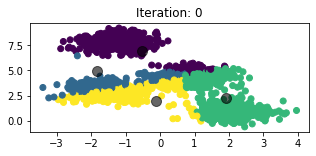

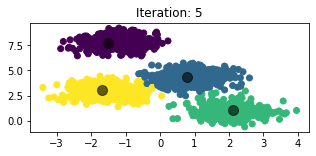

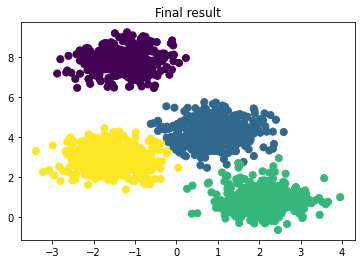

In [7]:
#Implement K-means from scratch
from sklearn.metrics import pairwise_distances_argmin

X, y_true = make_blobs(n_samples=1500, centers=4,
                       cluster_std=0.60, random_state=0)

def mini_batch_kmeans(X, n_clusters, replacement=True, 
                      batch_size=100, max_iter=100):
    n_samples, n_features = X.shape

    #1. randomly choose n clusters from X
    rng = np.random.RandomState(99)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    #having max iter makes sure it will stop eventually
    for ix in np.arange(max_iter):
        random = rng.randint(X.shape[0])
        X_batch = X[random:random+batch_size]

        #2. assign lables based on closest center
        labels = pairwise_distances_argmin(X_batch, centers)

        #3. find new centers
        new_centers = []
        for i in range(n_clusters):
            new_centers.append(X_batch[labels == i].mean(axis=0))

        #convert list to np.array; you can actually combine #3
        #with np.array in one sentence 
        new_centers = np.array(new_centers)
        
        #plotting purpose
        #plot every 5th iteration to save space
        if (ix % 5 == 0):
            pred = pairwise_distances_argmin(X, new_centers)
            plt.figure(figsize=(5, 2))
            plt.title(f"Iteration: {ix}")
            plt.scatter(X[:, 0], X[:, 1], c=pred)
            plt.scatter(new_centers[:, 0], new_centers[:, 1], s=100, c="black", alpha=0.6)

        #4 stopping criteria - if centers do not 
        #change anymore, we stop!
        #make sure to add rtol or atol since mini-batch does not converge
        if(np.allclose(centers, new_centers, rtol=0.2)):
            break
        else:
            centers = new_centers
            
    print(f"Done in {ix} iterations")
    return centers
        
def predict(X, centers):
    return pairwise_distances_argmin(X, centers)

start = time()
preds = predict(X, mini_batch_kmeans(X, n_clusters=4))
print(f"Fit and predict time {time() - start}")
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=preds, s=50)
plt.title("Final result")

# #3

First eigenvalues should be 0 accordingspectral clustering proof:  (-6.895525817007808e-17+0j)
First eigenvectors should be c across all row accordingspectral clustering proof:  [-0.07071068 -0.07071068 -0.07071068 -0.07071068 -0.07071068]


"\nYou may wonder how about situations with more than 2 clusters.  Since\neigenvectors contain information about the connection, we can simply\ninput the eigenvectors (let's say we want 4 clusters), thus we\ncan simply write:\n\nkmeans = KMeans(n_clusters = 4)\nkmeans.fit(eigenvectors[:, 1:4])\npreds = kmeans.labels_\n\nThat's it!\n"

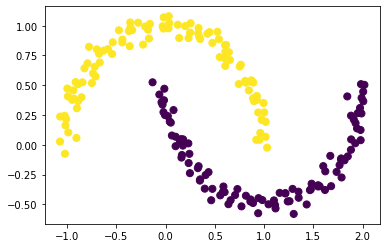

In [8]:
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import KMeans

X, y = make_moons(200, noise=.05, random_state=0)

#create an adjacency matrix
#this kneighbors_graph treats evvery data point as node
#and edge is drown to another node only if they are
#within the nth nearest neighbors (here I use 10)
A = kneighbors_graph(X, n_neighbors=10).toarray()

#create the degree matrix
#which is basically the sum of each row of A, and put it in the diagonal axis
D = np.diag(A.sum(axis=1))

#Laplacian graph is basically D - A
L = D - A

#find the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(L)

#sort eigenvectors based on eigenvalues sort
#THIS IS DIFFERENT FROM PCA BECAUSE WE ARE SORTING SMALLEST TO BIGGEST
eigenvectors = eigenvectors[:, np.argsort(eigenvalues)]

#use eigenvector with second SMALLEST eigenvalues (also known as
#Fiedler value) to find best cut to separate data
#then use the sign of eigenvectors to determine the labels
#second smallest eigenvalues will tell us the minimum connection
#between two big component
preds = eigenvectors[:, 1] > 0

#Just for your information
print("First eigenvalues should be 0 according" + 
      "spectral clustering proof: ", eigenvalues[0])

#.real convert complex numbers to float
# c is any constant.  
# take first five for shortening the presentation
print("First eigenvectors should be c across all row according" + 
      "spectral clustering proof: ", eigenvectors[:, 0][:5].real)

plt.scatter(X[:, 0], X[:, 1], c=preds,
            s=50, cmap='viridis')

"""
You may wonder how about situations with more than 2 clusters.  Since
eigenvectors contain information about the connection, we can simply
input the eigenvectors (let's say we want 4 clusters), thus we
can simply write:

kmeans = KMeans(n_clusters = 4)
kmeans.fit(eigenvectors[:, 1:4])
preds = kmeans.labels_

That's it!
"""

# #4

LL difference:  38167.12927280541
LL difference:  2881.613624414167
LL difference:  32554.640505499425
LL difference:  37370.74714419684
LL difference:  47552.23509271402
LL difference:  74103.6399231544
LL difference:  70710.1096772867
LL difference:  189767.4322204428
LL difference:  146939.3708442637
LL difference:  37.724152680137195
LL difference:  298.8045697377529
LL difference:  114.13851751142647
LL difference:  41.7334024857264
LL difference:  15.130834801821038
LL difference:  5.469763216096908
LL difference:  1.9751158508006483


Text(0.5, 1.0, 'Final')

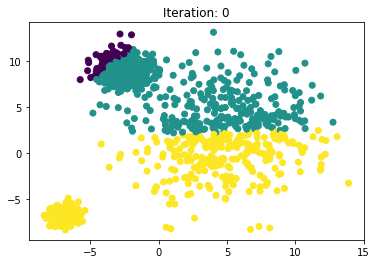

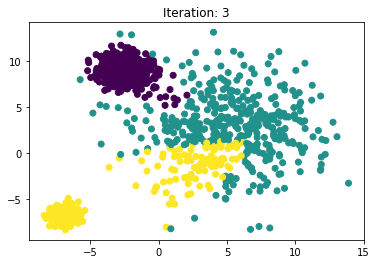

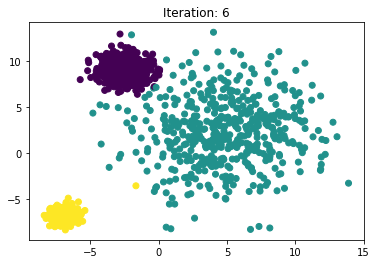

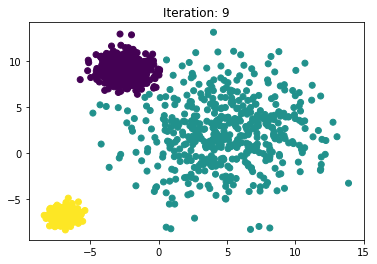

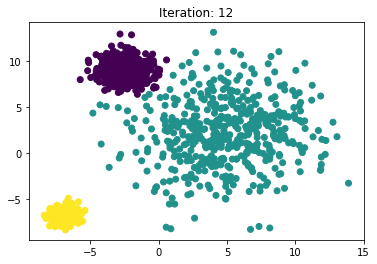

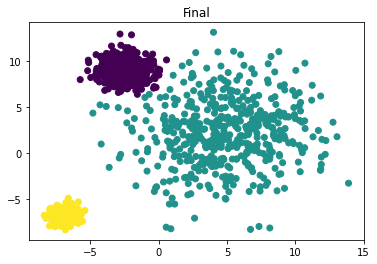

In [9]:
from sklearn.cluster import KMeans
from scipy.stats import multivariate_normal
import math

X, y = datasets.make_blobs(n_samples=1500,
                             cluster_std=[1.0, 3.5, 0.5],
                            random_state=42)
#define basic params
N, M = X.shape
K = 3
max_iter = 20

#old likelihood just for comparison
oldLL = 0

#define gaussian params
#all these params are in vectorized form
#meaning they contain values for all clusters
R = np.full(shape=(N, K), fill_value=1/K)

#simply use 1/k for pi
P = np.full((K, ), fill_value=1/K)

#simply use some rows as mean
random_row = np.random.randint(low=0, high=N, size=K)
MU = np.array([X[idx,:] for idx in random_row ]).T #.T to make to shape (M, K)

#simply use cov of the whole matrix as intialization
SIG = np.array([np.cov(X.T) for _ in range (K)])

for iteration in range(max_iter):
    
    #===E-Step=====
    #Update rc of each sample
    for i in range(N):
        for c in range(K):
            prob_of_xi = multivariate_normal.pdf(X[i], mean=MU[:, c], cov=SIG[c])
            R[i, c] = P[c] * prob_of_xi
        R[i] /= np.sum(R[i])
    
    #calculate log likelihood
    #check for convergence
    #you can delete this part of code, but
    #checking difference in log likelihood is a 
    #good stopping criteria
    LL = 0
    for i in range(N):
        for c in range(K):
            LL += math.log(P[c])
            LL += multivariate_normal.logpdf(
                X[i], mean=MU[:, c], cov=SIG[c])
    
    #if there is less than 0 increase in performance
    #in terms of log likelihood, we stop
    print("LL difference: ", math.fabs(LL - oldLL))
    if(math.fabs(LL-oldLL) < 5):
        break
    oldLL = LL
    
    #every three plot once
    if(iteration % 3 == 0):
        preds = np.argmax(R, axis=1)
        plt.figure()
        plt.scatter(X[:, 0], X[:, 1], c=preds)
        plt.title(f"Iteration: {iteration}")
    
    #===M-Step====
    #mc = sum of all rc
    #MC is vectorized form of all mc
    #Axis = 0 -> sum across all samples
    MC = np.sum(R, axis=0)
    assert MC.shape == (K, )
    
    #P is vectorized form of all pi
    P = MC / N
    assert P.shape == (K, )
    
    #mean
    #each mean is xi * ri / mc
    #MU is vectorized form of all mean
    MU =  ( X.T @ R ) / MC
    assert MU.shape == (M, K)
    
    #covariance (also called Sigma)
    #SIG is vectorized form of all covariances 
    for c in range(K):
        for i in range(N):
            Xmu = (X[i]-MU[:, c]).reshape(-1, 1)
            SIG[c] += R[i, c] * (Xmu @ Xmu.T)
        SIG[c] /= MC[c]
    assert SIG.shape == (K, M, M)
        

#get preds
preds = np.argmax(R, axis=1)

#plot
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=preds)
plt.title("Final")